# Validation Backward Compatibility (VBC) Source2Suffering Framework

__Objective__ : The aim of this Jupyter Notebook is to sequentially compare the different values produced by the original Lifetime Exposure framework developed by Thiery et al. (2021) and the Source2Suffering framework developed in Laridon et al. (2025). As a final benchmark to compare the results of both frameworks, we will examine the findings of the Expert Opinion written by Prof. W. Thiery for Greenpeace Romania regarding the "Neptun Deep" oil field project.

__Author__ : Amaury Laridon

__Date__ : 21 May 2025

---

Init Libraries and path

In [1]:
#%%  ----------------------------------------------------------------
# import and path
# ----------------------------------------------------------------

import xarray as xr
import pickle as pk
import time
# from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import mapclassify as mc
from copy import deepcopy as cp
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy as cr
import geopandas as gpd
import sys
from operator import index
import numpy as np
import pandas as pd
from scipy import interpolate
from scipy import stats as sts
import regionmask as rm
import glob
%matplotlib inline

notebook_path = os.getcwd()  # Current path
print("Directory of the notebook:", notebook_path)
notebook_path = notebook_path

scripts_dir = "/data/brussel/vo/000/bvo00012/vsc11137/source2suffering"
data_dir = scripts_dir+"/data/"

sys.path.append(os.path.abspath(scripts_dir))

Directory of the notebook: /vscmnt/brussel_pixiu_data/_data_brussel/vo/000/bvo00012/vsc11137/source2suffering/sandbox


Settings

In [2]:
ages = np.arange(60,-1,-1)
age_young = 0
age_ref = np.nanmax(ages)
age_range = np.arange(0,105)
year_ref = 2020
year_start = year_ref - age_ref
birth_years = np.arange(year_start,year_ref+1)     
year_end = 2113 # based on maximum life expectancy reported in UNWPP
year_range = np.arange(year_start,year_end+1)

## 1. Results of the Land Fraction Exposed (LFE) to hazard annually 

Here I compare Fig.(1a) of Thiery et al.(2021) with the results of the Source2Suffering framework

### Effect of the smoothing before remapping

#### A. Results with Smoothing 

In [3]:
with open(data_dir+'{}/{}/ds_lfe_perregion_gmt_{}_{}.pkl'.format('pickles_v3','heatwavedarea','original','rm'), 'rb') as f:
            ds_lfe_perregion_rm = pk.load(f)

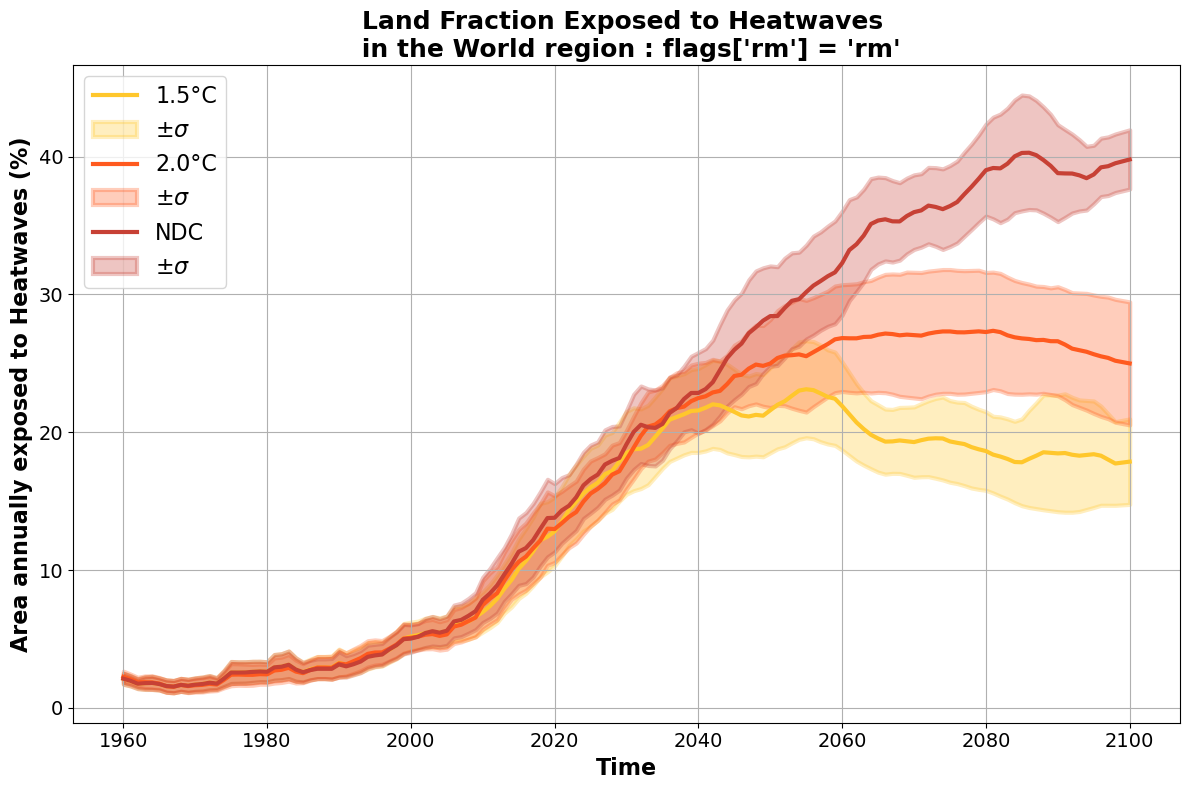

In [17]:
plt.close('all') 

plt.figure(figsize=(12, 8))

extr_name = 'Heatwaves'
GMT_label = ['1.5°C', '2.0°C','NDC']  
GMT_color = ['#FFC72C', '#FF5A1F', '#C74135']
region_name = 'World'
ind_region = 11

    
lfe_15_rm = ds_lfe_perregion_rm['mmm_15_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_15_rm = ds_lfe_perregion_rm['std_15_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

lfe_20_rm = ds_lfe_perregion_rm['mmm_20_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_20_rm = ds_lfe_perregion_rm['std_20_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

lfe_NDC_rm = ds_lfe_perregion_rm['mmm_NDC_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_NDC_rm = ds_lfe_perregion_rm['std_NDC_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

plt.plot(year_range[:-13], lfe_15_rm*100, linestyle='-',color=GMT_color[0],label=GMT_label[0], lw=3)
plt.fill_between(year_range[:-13], lfe_15_rm*100 - y_std_15_rm*100, lfe_15_rm*100 + y_std_15_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[0], lw=3)

plt.plot(year_range[:-13], lfe_20_rm*100, linestyle='-',color=GMT_color[1],label=GMT_label[1], lw=3)
plt.fill_between(year_range[:-13], lfe_20_rm*100 - y_std_20_rm*100, lfe_20_rm*100 + y_std_20_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[1], lw=3)

plt.plot(year_range[:-13],lfe_NDC_rm*100, linestyle='-',color=GMT_color[2],label=GMT_label[2], lw=3)
plt.fill_between(year_range[:-13], lfe_NDC_rm*100 - y_std_NDC_rm*100, lfe_NDC_rm*100 + y_std_NDC_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[2], lw=3)

plt.title("Land Fraction Exposed to {} \n in the {} region : flags['rm'] = 'rm'".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel("Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.show()

#### B. Results without Smoothing 

In [5]:
with open(data_dir+'{}/{}/ds_lfe_perregion_gmt_{}_{}.pkl'.format('pickles_v3','heatwavedarea','original','no_rm'), 'rb') as f:
            ds_lfe_perregion_no_rm = pk.load(f)

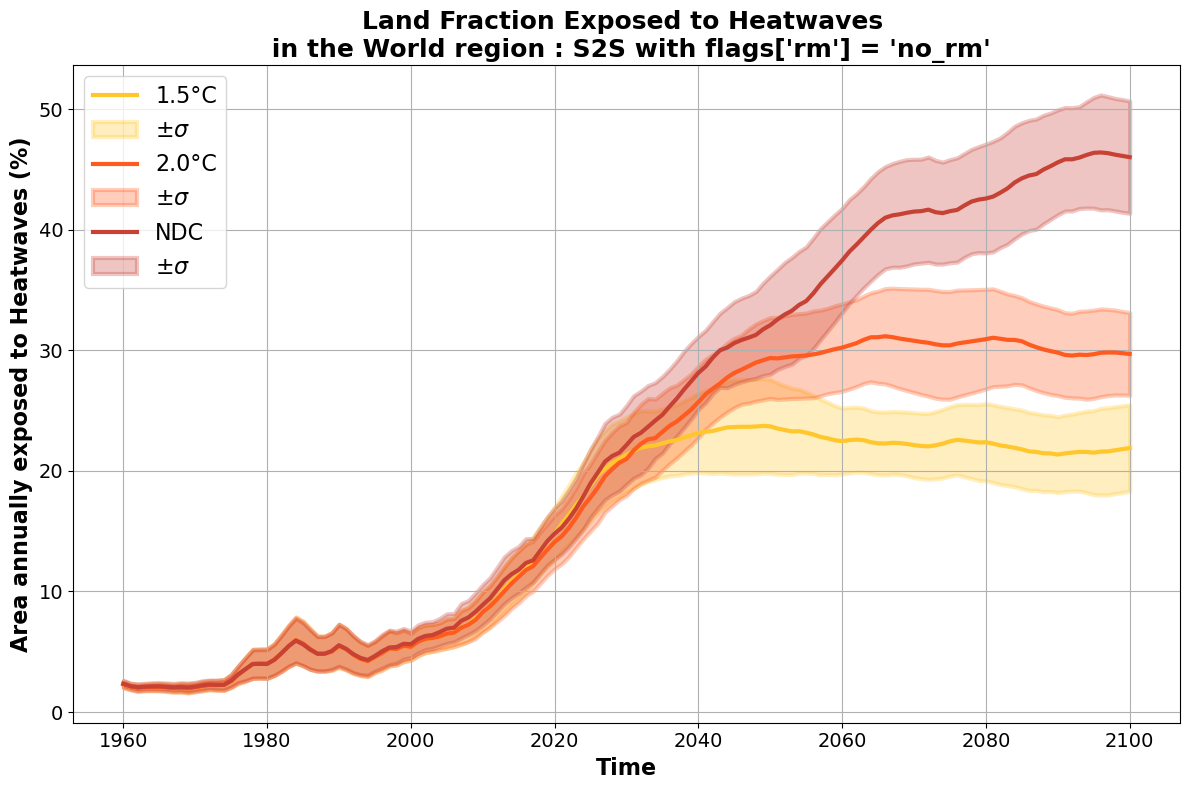

In [22]:
plt.close('all') 

plt.figure(figsize=(12, 8))

extr_name = 'Heatwaves'
GMT_label = ['1.5°C', '2.0°C','NDC']  
GMT_color = ['#FFC72C', '#FF5A1F', '#C74135']
region_name = 'World'
ind_region = 11

    
lfe_15_no_rm = ds_lfe_perregion_no_rm['mmm_15_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_15_no_rm = ds_lfe_perregion_no_rm['std_15_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

lfe_20_no_rm = ds_lfe_perregion_no_rm['mmm_20_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_20_no_rm = ds_lfe_perregion_no_rm['std_20_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

lfe_NDC_no_rm = ds_lfe_perregion_no_rm['mmm_NDC_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))

y_std_NDC_no_rm = ds_lfe_perregion_no_rm['std_NDC_sm'].sel(region=ind_region).isel(time_ind=slice(0, -13))/2

plt.plot(year_range[:-13], lfe_15_no_rm*100, linestyle='-',color=GMT_color[0],label=GMT_label[0], lw=3)
plt.fill_between(year_range[:-13], lfe_15_no_rm*100 - y_std_15_no_rm*100, lfe_15_no_rm*100 + y_std_15_no_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[0], lw=3)

plt.plot(year_range[:-13], lfe_20_no_rm*100, linestyle='-',color=GMT_color[1],label=GMT_label[1], lw=3)
plt.fill_between(year_range[:-13], lfe_20_no_rm*100 - y_std_20_no_rm*100, lfe_20_no_rm*100 + y_std_20_no_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[1], lw=3)

plt.plot(year_range[:-13],lfe_NDC_no_rm*100, linestyle='-',color=GMT_color[2],label=GMT_label[2], lw=3)
plt.fill_between(year_range[:-13], lfe_NDC_no_rm*100 - y_std_NDC_no_rm*100, lfe_NDC_no_rm*100 + y_std_NDC_no_rm*100, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[2], lw=3)

plt.title("Land Fraction Exposed to {} \n in the {} region : S2S with flags['rm'] = 'no_rm'".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel("Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.show()

#### C. Comparison between flags['rm'] within the Source2Suffering Framework

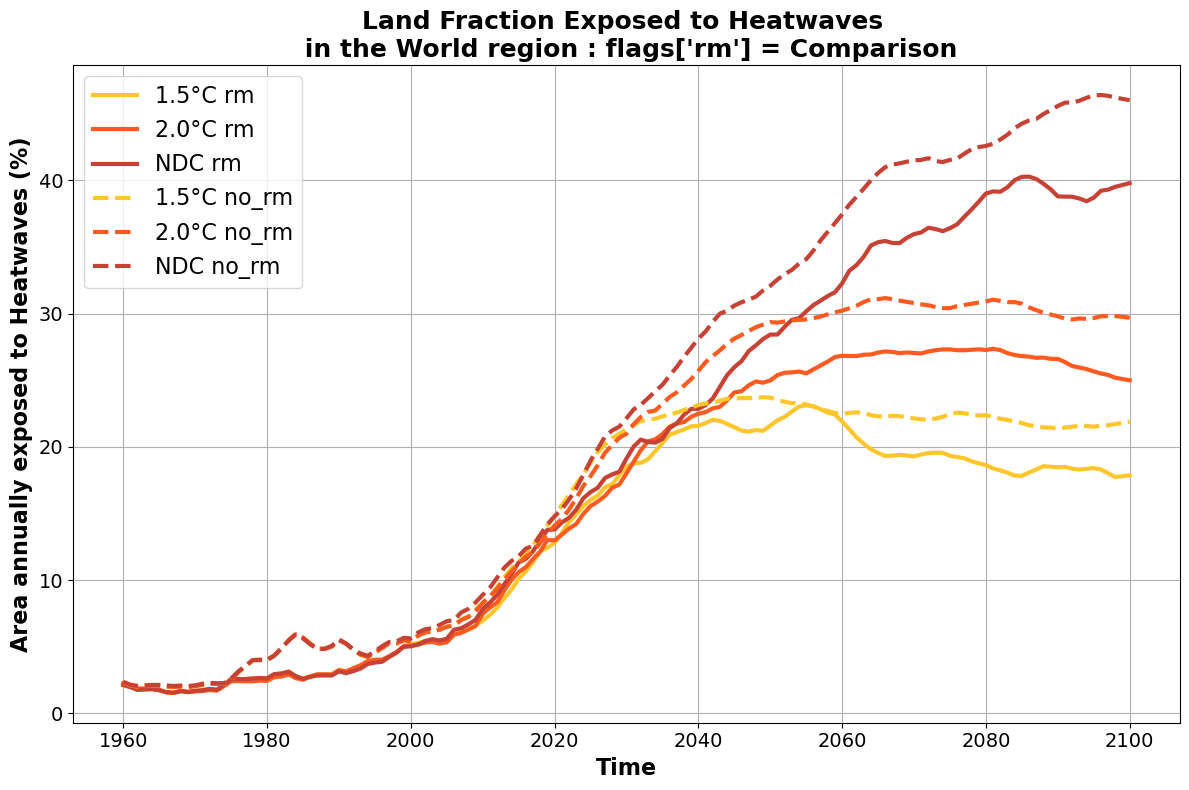

In [15]:
plt.close('all') 

plt.figure(figsize=(12, 8))

plt.plot(year_range[:-13], lfe_15_rm*100, linestyle='-',color=GMT_color[0],label=GMT_label[0] + ' rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_15_rm - y_std_15_rm, lfe_15_rm + y_std_15_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[0], lw=3)

plt.plot(year_range[:-13], lfe_20_rm*100, linestyle='-',color=GMT_color[1],label=GMT_label[1] + ' rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_20_rm - y_std_20_rm, lfe_20_rm + y_std_20_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[1], lw=3)

plt.plot(year_range[:-13],lfe_NDC_rm*100, linestyle='-',color=GMT_color[2],label=GMT_label[2] + ' rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_NDC_rm - y_std_NDC_rm, lfe_NDC_rm + y_std_NDC_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[2], lw=3)

plt.plot(year_range[:-13], lfe_15_no_rm*100, linestyle='--',color=GMT_color[0],label=GMT_label[0] + ' no_rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_15_no_rm - y_std_15_no_rm, lfe_15_no_rm + y_std_15_no_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[0], lw=3)

plt.plot(year_range[:-13], lfe_20_no_rm*100, linestyle='--',color=GMT_color[1],label=GMT_label[1] + ' no_rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_20_no_rm - y_std_20_no_rm, lfe_20_no_rm + y_std_20_no_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[1], lw=3)

plt.plot(year_range[:-13],lfe_NDC_no_rm*100, linestyle='--',color=GMT_color[2],label=GMT_label[2] + ' no_rm', lw=3)
#plt.fill_between(year_range[:-13], lfe_NDC_no_rm - y_std_NDC_no_rm, lfe_NDC_no_rm + y_std_NDC_no_rm, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[2], lw=3)

plt.title("Land Fraction Exposed to {} \n in the {} region : flags['rm'] = Comparison".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel("Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.show()

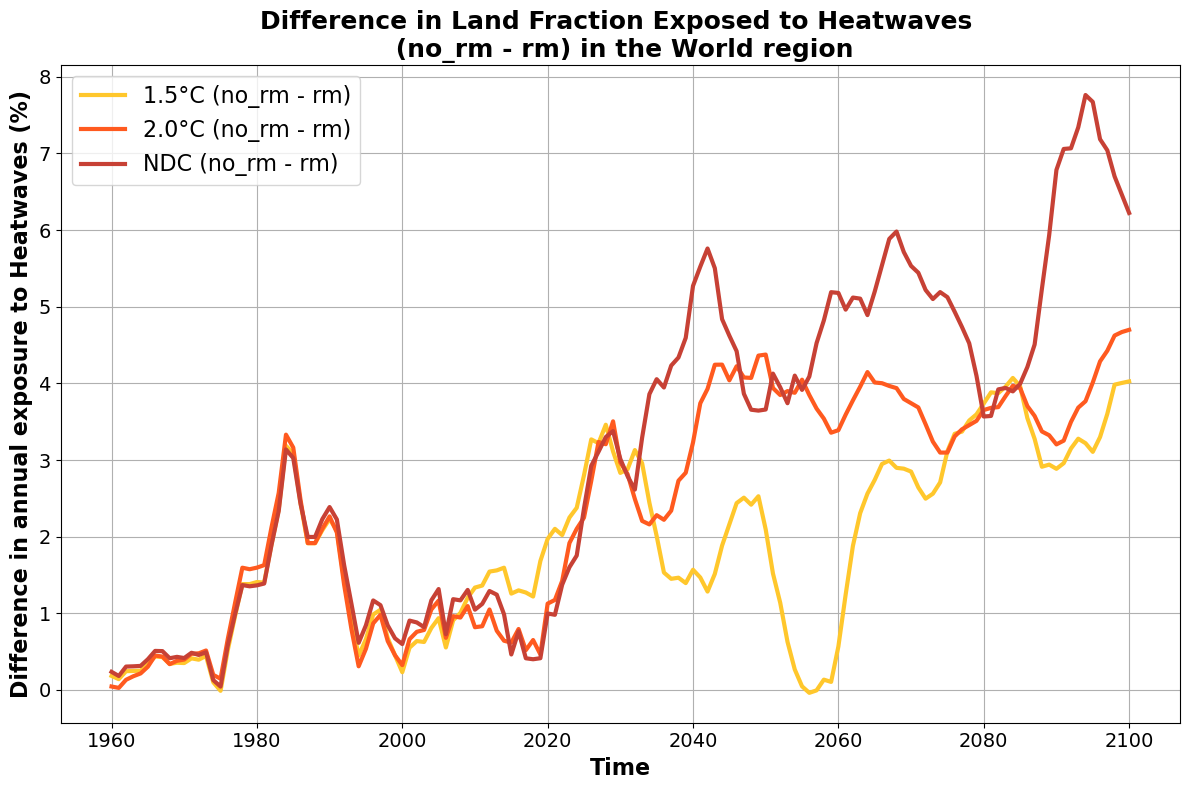

In [14]:
plt.close('all')

plt.figure(figsize=(12, 8))

# Tracer la différence (no_rm - rm) pour chaque scénario
plt.plot(
    year_range[:-13],
    (lfe_15_no_rm - lfe_15_rm)*100,
    linestyle='-',
    color=GMT_color[0],
    label=GMT_label[0] + ' (no_rm - rm)',
    lw=3
)

plt.plot(
    year_range[:-13],
    (lfe_20_no_rm - lfe_20_rm)*100,
    linestyle='-',
    color=GMT_color[1],
    label=GMT_label[1] + ' (no_rm - rm)',
    lw=3
)

plt.plot(
    year_range[:-13],
    (lfe_NDC_no_rm - lfe_NDC_rm)*100,
    linestyle='-',
    color=GMT_color[2],
    label=GMT_label[2] + ' (no_rm - rm)',
    lw=3
)

# Mise en forme du graphique
plt.title(
    "Difference in Land Fraction Exposed to {} \n (no_rm - rm) in the {} region".format(extr_name, region_name),
    fontsize=18,
    fontweight='bold'
)
plt.xlabel("Time", fontsize=16, fontweight='bold')
plt.ylabel("Difference in annual exposure to {} (%)".format(extr_name), fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.show()

#### D. Comparison between Source2Suffering framework with and flags['rm']='no_rm' and Thiery et al.(2021)

Import the .mat objects

In [9]:
from scipy.io import loadmat

WT_landfrac_15_plot = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_15_plot.mat',squeeze_me=True)

WT_landfrac_15_plot = WT_landfrac_15_plot['landfrac_15_plot'][:-13]

WT_landfrac_15_plot_mms = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_15_plot_mms.mat',squeeze_me=True)

WT_landfrac_15_plot_mms = WT_landfrac_15_plot_mms['landfrac_15_mms_plot'][:-13]/2

WT_landfrac_20_plot = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_20_plot.mat',squeeze_me=True)

WT_landfrac_20_plot = WT_landfrac_20_plot['landfrac_20_plot'][:-13]

WT_landfrac_20_plot_mms = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_20_plot_mms.mat',squeeze_me=True)

WT_landfrac_20_plot_mms = WT_landfrac_20_plot_mms['landfrac_20_mms_plot'][:-13]/2

WT_landfrac_NDC_plot = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_NDC_plot.mat',squeeze_me=True)

WT_landfrac_NDC_plot = WT_landfrac_NDC_plot['landfrac_NDC_plot'][:-13]

WT_landfrac_NDC_plot_mms = loadmat(scripts_dir+'/references/lifetime_exposure_wim/lifetime_exposure_wim_v1/landfrac_NDC_plot_mms.mat',squeeze_me=True)

WT_landfrac_NDC_plot_mms = WT_landfrac_NDC_plot_mms['landfrac_NDC_mms_plot'][:-13]/2


Plot of Thiery et al.(2021) results

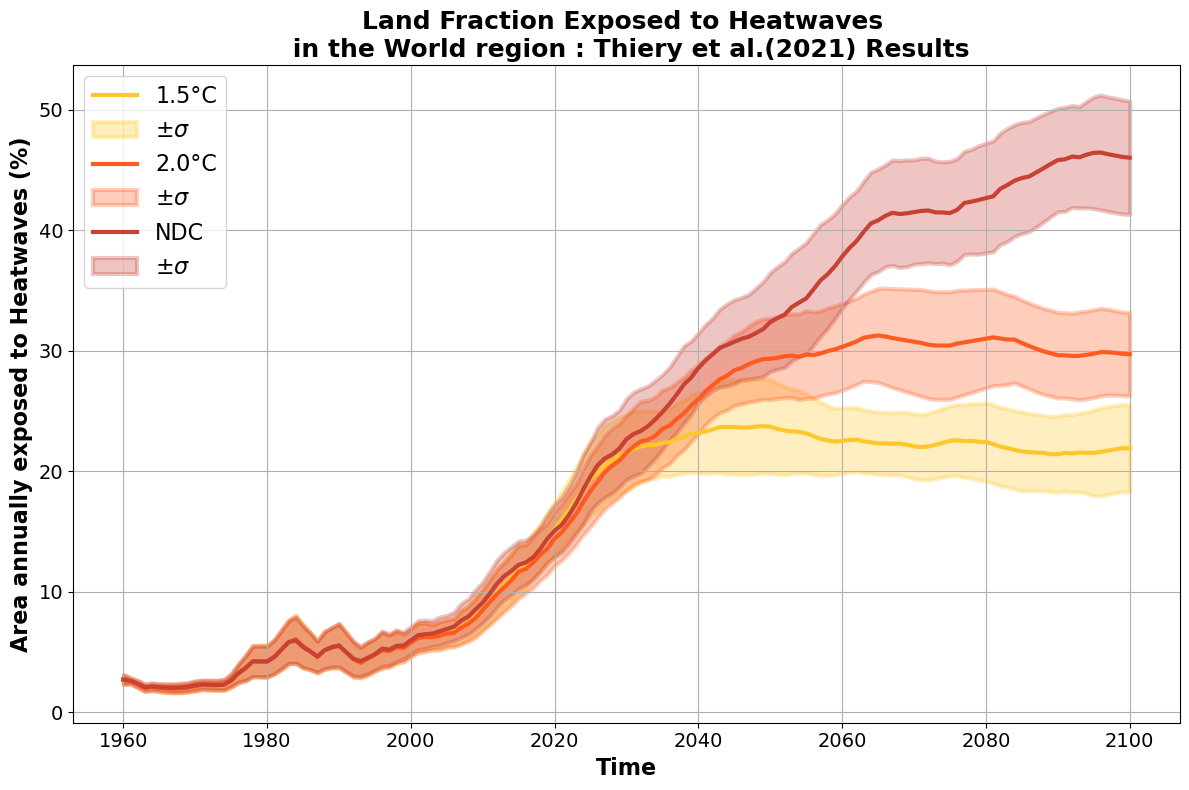

In [10]:
plt.close('all') 

plt.figure(figsize=(12, 8))

extr_name = 'Heatwaves'
GMT_label = ['1.5°C', '2.0°C','NDC']  
GMT_color = ['#FFC72C', '#FF5A1F', '#C74135']
region_name = 'World'
ind_region = 11

plt.plot(year_range[:-13], WT_landfrac_15_plot, linestyle='-',color=GMT_color[0],label=GMT_label[0], lw=3)
plt.fill_between(year_range[:-13], WT_landfrac_15_plot - WT_landfrac_15_plot_mms, WT_landfrac_15_plot + WT_landfrac_15_plot_mms, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[0], lw=3)

plt.plot(year_range[:-13], WT_landfrac_20_plot, linestyle='-',color=GMT_color[1],label=GMT_label[1], lw=3)
plt.fill_between(year_range[:-13], WT_landfrac_20_plot - WT_landfrac_20_plot_mms, WT_landfrac_20_plot + WT_landfrac_20_plot_mms, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[1], lw=3)

plt.plot(year_range[:-13],WT_landfrac_NDC_plot, linestyle='-',color=GMT_color[2],label=GMT_label[2], lw=3)
plt.fill_between(year_range[:-13], WT_landfrac_NDC_plot - WT_landfrac_NDC_plot_mms, WT_landfrac_NDC_plot + WT_landfrac_NDC_plot_mms, alpha=0.3, label=r'$\pm \sigma$',color=GMT_color[2], lw=3)

plt.title("Land Fraction Exposed to {} \n in the {} region : Thiery et al.(2021) Results".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel("Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.show()

Plot of the S2S flags['rm'] = 'no_rm' and Thiery et al.(2021) results

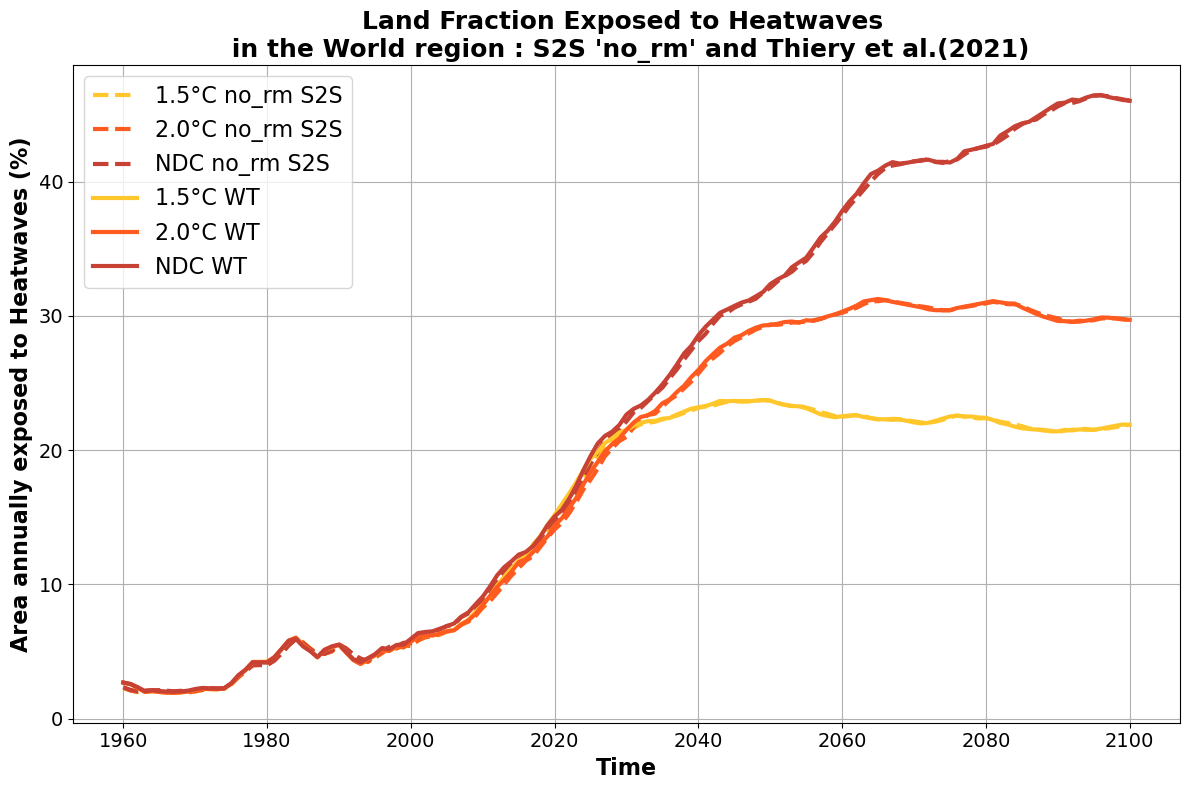

In [13]:
plt.close('all') 

plt.figure(figsize=(12, 8))

plt.plot(year_range[:-13], lfe_15_no_rm*100, linestyle='--',color=GMT_color[0],label=GMT_label[0] + ' no_rm S2S', lw=3)

plt.plot(year_range[:-13], lfe_20_no_rm*100, linestyle='--',color=GMT_color[1],label=GMT_label[1] + ' no_rm S2S', lw=3)

plt.plot(year_range[:-13],lfe_NDC_no_rm*100, linestyle='--',color=GMT_color[2],label=GMT_label[2] + ' no_rm S2S', lw=3)

plt.plot(year_range[:-13], WT_landfrac_15_plot, linestyle='-',color=GMT_color[0],label=GMT_label[0] + ' WT', lw=3)

plt.plot(year_range[:-13], WT_landfrac_20_plot, linestyle='-',color=GMT_color[1],label=GMT_label[1] + ' WT', lw=3)

plt.plot(year_range[:-13], WT_landfrac_NDC_plot, linestyle='-',color=GMT_color[2],label=GMT_label[2] + ' WT', lw=3)

plt.title("Land Fraction Exposed to {} \n in the {} region : S2S 'no_rm' and Thiery et al.(2021)".format(extr_name, region_name),fontsize=18,fontweight='bold')
plt.xlabel("Time",fontsize=16,fontweight='bold')
plt.ylabel("Area annually exposed to {} (%)".format(extr_name),fontsize=16,fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.show()

Plot of the S2S flags['rm'] = 'no_rm' - Thiery et al.(2021) results

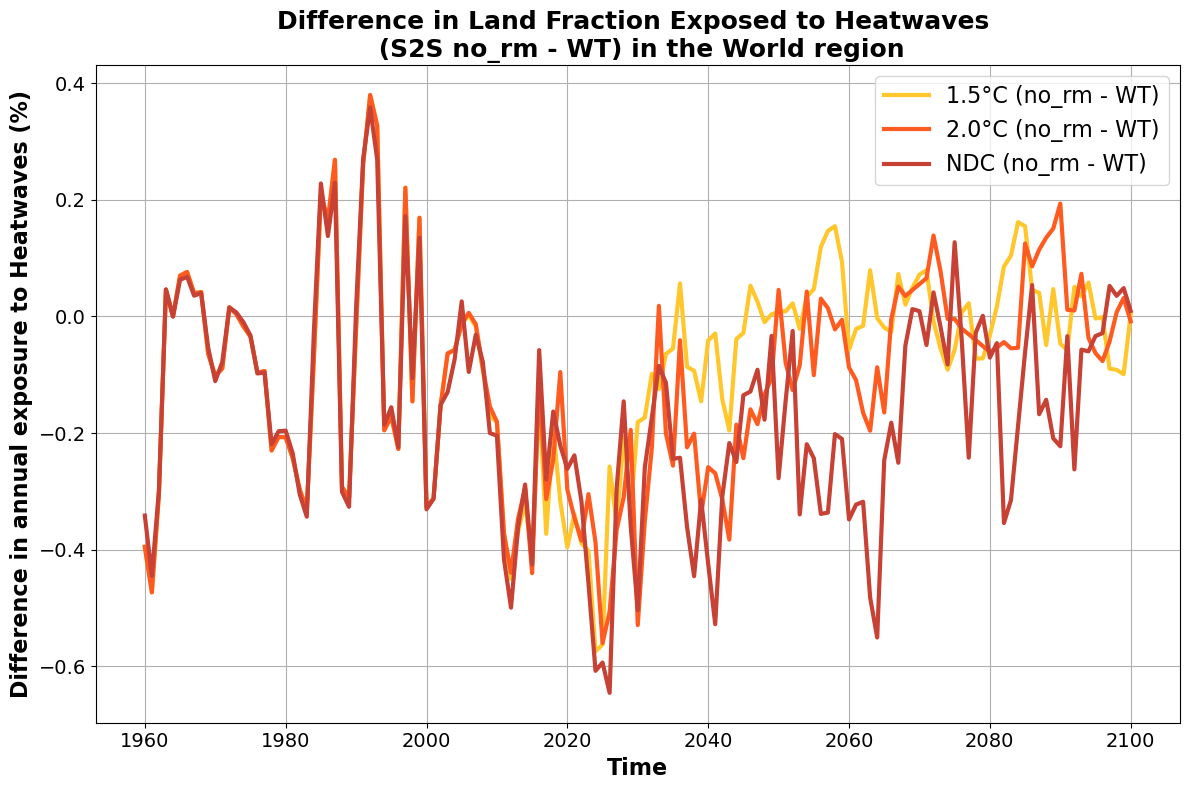

In [21]:
plt.close('all')

plt.figure(figsize=(12, 8))

# Tracer la différence (no_rm - rm) pour chaque scénario
plt.plot(
    year_range[:-13],
    ((lfe_15_no_rm)*100 - WT_landfrac_15_plot),
    linestyle='-',
    color=GMT_color[0],
    label=GMT_label[0] + ' (no_rm - WT)',
    lw=3
)

plt.plot(
    year_range[:-13],
    ((lfe_20_no_rm)*100 - WT_landfrac_20_plot),
    linestyle='-',
    color=GMT_color[1],
    label=GMT_label[1] + ' (no_rm - WT)',
    lw=3
)

plt.plot(
    year_range[:-13],
    ((lfe_NDC_no_rm)*100- WT_landfrac_NDC_plot),
    linestyle='-',
    color=GMT_color[2],
    label=GMT_label[2] + ' (no_rm - WT)',
    lw=3
)

# Mise en forme du graphique
plt.title(
    "Difference in Land Fraction Exposed to {} \n (S2S no_rm - WT) in the {} region".format(extr_name, region_name),
    fontsize=18,
    fontweight='bold'
)
plt.xlabel("Time", fontsize=16, fontweight='bold')
plt.ylabel("Difference in annual exposure to {} (%)".format(extr_name), fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.legend(fontsize=16)
plt.show()

### Effect of the Geometric Mean 

## 2. Results of the Lifetime Exposure (LE) assessment

### Effect of the smoothing before remapping

### Effect of the Geometric Mean

### Effect of the Demography differences 

### SR15 Vs AR6 Stylized trajectories

## 3. Results of emissions2npeople

### The Neptun Deep Assessment

#### 1. The smoothing effect

#### 2.Comparison of the metric : Slope hazard/°C

#### 3. Effect of the TCRE